# Experiment Analysis - Jupyter Notebook

## Handeln

#### Intro

The first few weeks of the seminar were used to get into the idea of motor control. A good way to learn is also to experience the stimuli and action in the field of human perception and action. Therefore, the first weeks were focussed on doing a simple pointing task in different conditions towards different target shapes.

You should already have been working on the analysis but this file is there to offer a bit more support for calculating mean trajectories.

#### Requirements before using this notebook

**Before starting to work on this notebook you should have:** 
- installed the required conda environment
- run the little experiment on yourself (best using a graphics tablet or computer mouse, but failing that a track pad), as you will be working on your own data.
- tried to work with the initial analysis and helper files and have managed to:
    - plot the trajectory of a single trial
    - have read the data from all trials into a single dataframe (e.g. using the combination of `pd.read_csv` and `pd.concat`)
    - have added the velocities for the trials (best immediately done at read-in or using group-by: see previous analysis notebook and helper functions)
    - have normalized the time for each trial (best immediately done at read-in or using group-by: see previous analysis notebook and helper function)

***This particular notebook*** offers a little more help to getting mean trajectories once you have worked out which trials belong to the same condition. So, to work with it you do still need to figure out which trials to take the mean across (i.e. which trials belong to which condition). This you can try to get by code, but can also be worked out by hand by looking at the trial files and the conditions for each trial and manually sorting them.


### Imports
We'll start by loading the most useful packages:
- Numpy: for processing the data (see [here](https://numpy.org/doc/stable/reference/index.html) for documentation / more information)
- Pandas: to read in the data for a given trial (see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) for documentation / more information)
- Matplotlib: to make some plots (see [here](https://matplotlib.org/) for documentation / more information)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import os # for interacting with the operating system (get file names etc)
# import re # for using socalled regular expressions
import Analysis_helper_functions as helpers

## 1. The data frames

We will here assume that you have managed to read the data from all trials into pandas dataframes.
Depending on how you did this the data can have different formats. Two ways suggested in the seminars:

1. One big dataframe with everything including:
- extra columns for the velocity
- extra column for the normalized time (which we can use for getting the average trajectory for a specific condition)
- extra columns for the conditions
2. Two dataframes
- A separate one for the trajectories including velocities and normalised time
- A separate one that stores the conditions for each trial

Important in both formats is that there is a columnn specifying the trial number the data is from and that this can be linked to a specific condition.

You can look back on the earlier experiment script that provide useful functions for this from python (pandas' `read_csv` and `concat`), as well as the `Analysis_helpers_functions.py` file (which contains helpful functions to help deal with our particular data, such as adding the velocity and normalised time). If you are struggling with this, you may find it helpful to do the following steps trial by trial:

- read in data
- add velocity (using the `velocity` helper function)
- normalise time (using the `normalize_time` helper function)
- [optional] add the condition columns to same dataframe (or save them to add to seperate conditions dataframe)

and only once the relevant columns have been added for a given trial, then add the whole trial to the big dataframe that has the data from all trials in it.

### Read in dataframes
Below we have prepared two versions of collated data (one with the conditions as separate columns `1DF_including_conditions.csv`; one with two separate files in which in one the trajectories are stored, `2DF_trajectories.csv`, and in the other the corresponding conditions `2DF_conditions.csv`). You can read in the version that most closely matches your own grand dataframe that contains all trials to make the example here work.

Note that to illustrate an example for the average trajectories we have limited these to the first two trials for each condition. In your analysis you should of course use all the repetitions for each condition.

In [2]:
# ----------------------------------
# Use this example if you have one dataframe that has both trajectories and conditions in columns
#-----------------------------------

normdataDF = pd.read_csv('1DF_including_conditions.csv')

# ----------------------------------
# Or replace with you own data reading loop for using your own data
#-----------------------------------


In [3]:
# ----------------------------------
# Use this example if you have two dataframes
#-----------------------------------

normdataDF = pd.read_csv('2DF_trajectories.csv')
conDF = pd.read_csv('2DF_conditions.csv')

# ----------------------------------
# Or replace with you own data reading loop for using your own data
#-----------------------------------


#### Computing average trajectory for one condition
Here we will give an example for computing the average trajectory. The data already needs to include normalised time for each trial.

What you need to sort out yourself:
- which trials (as indicated by the trial number column `trial`) you need to take the averagage across. That is you need to sort out which trials belong to the same condition for you own data. You can use code to work this out or you can work this out by hand.

Below we just provide a list for the conditions from our small example set of trajectories. We are using the condition index as is also used in the experimental output:

| condition index | cursor_SX | cursor_SY | cursor_shift | trials   |
|-----------|-----------|-----------|--------------|----------|
| 0         | 50        | 200       | -240         | [16, 17] |
| 1         | 50        | 200       | 0            | [3, 13]  |
| 2         | 50        | 200       | 240          | [8, 15]  |
| 3         | 100       | 100       | -240         | [12, 14] |
| 4         | 100       | 100       | 0            | [5, 9]   |
| 5         | 100       | 100       | 240          | [10, 11] |
| 6         | 200       | 50        | -240         | [0, 2]   |
| 7         | 200       | 50        | 0            | [6, 7]   |
| 8         | 200       | 50        | 240          | [1, 4]   |


So for this example dataset, if we want to take the average trajectory of the two trials for condition `0` we would need to take the average trajectory of trials 16 and 17 etc. Below we will use a hard coded list to get the right trial numbers. We will leave figuring out which trials numbers below to what condition, as something you can try to figure out how to code this for your own dataset (or as mentioned above work this out by hand).

In [5]:
# hardcoded dictionary linking condition index to trials
conditionSets = {
        'condition 0': {'con index': 0, 'cursor_SX': 50,'cursor_SY': 200, 'cursor_shift': -240,'trials': [16,17]},
        'condition 1': {'con index': 1, 'cursor_SX': 50,'cursor_SY': 200, 'cursor_shift': 0,'trials': [3,13]},
        'condition 2': {'con index': 2, 'cursor_SX': 50,'cursor_SY': 200, 'cursor_shift': 240,'trials': [8,15]},
        'condition 3': {'con index': 3, 'cursor_SX': 100,'cursor_SY': 100, 'cursor_shift': -240, 'trials': [12,14]},
        'condition 4': {'con index': 4, 'cursor_SX': 100,'cursor_SY': 100, 'cursor_shift': 0, 'trials': [5,9]},
        'condition 5': {'con index': 5, 'cursor_SX': 100,'cursor_SY': 100, 'cursor_shift': 240, 'trials': [10,11]},
        'condition 6': {'con index': 6, 'cursor_SX': 200,'cursor_SY': 50, 'cursor_shift': -240, 'trials': [0,2]},
        'condition 7': {'con index': 7, 'cursor_SX': 200,'cursor_SY': 50, 'cursor_shift': 0, 'trials': [6,7]},
        'condition 8': {'con index': 8, 'cursor_SX': 200,'cursor_SY': 50, 'cursor_shift': 240, 'trials': [1,4]},
}                       
conSetsDF = pd.DataFrame(conditionSets).T
conSetsDF

,con index,cursor_SX,cursor_SY,cursor_shift,trials
condition 0,0,50,200,-240,"[16, 17]"
condition 1,1,50,200,0,"[3, 13]"
condition 2,2,50,200,240,"[8, 15]"
condition 3,3,100,100,-240,"[12, 14]"
condition 4,4,100,100,0,"[5, 9]"
condition 5,5,100,100,240,"[10, 11]"
condition 6,6,200,50,-240,"[0, 2]"
condition 7,7,200,50,0,"[6, 7]"
condition 8,8,200,50,240,"[1, 4]"


The function below takes the trials listed in trialIndices, plots the corresponding trajectories, computes and plots the average trajectory for those trials.

In [6]:
def plotConditionTrajectories(dataDF,trialIndices):
    """ PlotConditionTrajectories(dataDF,conIndices,plotAverage = True)
    plots the data for the trials as listed in conIndices

    Input:
    dataDF: pandas dataframe containing data of all trials
    conIndices: which trials to plot
    """    
    
    # set subplot parameters
    fig, axs = plt.subplots(2,1,figsize=(3,5))
    first = True # set flag for drawing first trajectory where we can set a few more things
    # ----------------------------------------------------------------
    # plot the trajectories for individual trials
    # ----------------------------------------------------------------
    # Loop through conditions and plot trajectories
    for trialID in trialIndices:
        data = dataDF.loc[dataDF['trial']==trialID]
        #plot x-y trajectories of individual trials
        axs[0].plot(data['cursor_x'],data['cursor_y'],color = [0.5,0.5,0.5])
        if first: # if first trial to plot add some extra elements like start and target positions
            axs[0].set_xlabel('x position (pix)')
            axs[0].set_ylabel('y position (pix)')
            axs[0].set_aspect(1.0)
            first = False # set flag to not do this on next iterations in this loop
        # plot absolute velocity
        axs[1].plot(data['time'],data['vabs'],color=[0.5,0.5,0.5])
        axs[1].set_xlabel('time (s)')
        axs[1].set_ylabel('absolute speed (pix/s)')
        axs[1].set_ylim(0,4500)

    # ----------------------------------------------------------------
    # Obtain and plot the average trajectory
    # ----------------------------------------------------------------

    # get subset of the data with only the indicated trials using trialindices given
    normdata = dataDF[dataDF['trial'].isin(trialIndices)]
    # get average trajectory across those trial
    avTrajectory = normdata.groupby('normtime')[['cursor_x','cursor_y','vabs']].mean()
    # plot the average trajectory
    axs[0].plot(avTrajectory['cursor_x'],avTrajectory['cursor_y'],'k',linewidth = 3)

    # below follow the code for plotting average velocity profiles
    # get average movement time for the trials involved using the original time
    # We can use that to rescale the time-axis to its original time
    av_movetime = normdata.groupby('normtime')[['time']].mean()
    av_movetime = av_movetime.loc[1.0,'time']    
    # plot average speed whilst scaling time back to average movement time
    axs[1].plot(avTrajectory.index*av_movetime,avTrajectory['vabs'],'k',linewidth = 3)
    fig.tight_layout()




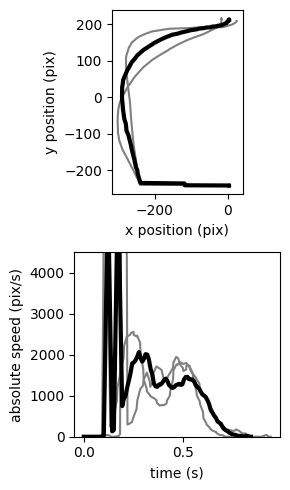

In [7]:
plotConditionTrajectories(normdataDF,conSetsDF.loc['condition 0','trials'])